In [1]:
%load_ext watermark
%watermark

2020-09-09T17:47:04-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-47-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

In [4]:
from sklearn.linear_model import LinearRegression as lr

In [5]:
modelo = lr()

In [6]:
modelo.fit(X=boston["data"], y=boston["target"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_objetivo = boston["target"]
y_pred = modelo.predict(boston["data"])

In [8]:
from sklearn import metrics

### Error absoluto medio
El error aboluto medio (Mean Absolute Error o MAE) se define como:

$$\dfrac{1}{n}\displaystyle\sum_{i=1}^{n}|y_i - \hat{y_i}|$$

Es decir, la media de las diferencias entre la variable objetivo y las predicciones sin el signo.

MAE es una metrica robusta, en cuanto a que no varia mucho si hay valores extremos en los datos. El error se puede interpretar como unidades de la variable objetivo.

In [9]:
metrics.mean_absolute_error?

In [10]:
metrics.mean_absolute_error(y_objetivo, y_pred)

3.2708628109003137

### Error cuadratico medio
Error cuadratico medio (Mean Squared Error o MSE)

$$\dfrac{1}{n} \displaystyle\sum_{i=1}^{n}(y_i-\hat{y_i})^2$$

Dado que el MSE se define en unidades al cuadrado, lo cual no es intuitivo, generalmente se utiliza la raiz.

### Raiz del error cuadratico medio (Root mean squared error RMSE)

$$\sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^{n}(y_i-\hat{y_i})^2}$$

1. El resultado se puede medir en las unidades de la variable objetivo
2. Tiene el problema de que da más importancia a los errores grandes


* El RMSE es muy sensible a las variaciones de predicción, por tanto es util darle uso cuando queremos notar errores muy grandes.
* El RMSE también resulta conveniente cuando la variable objetivo este muy bien distribuida

En el siguiente ejemplo se puede ver: 

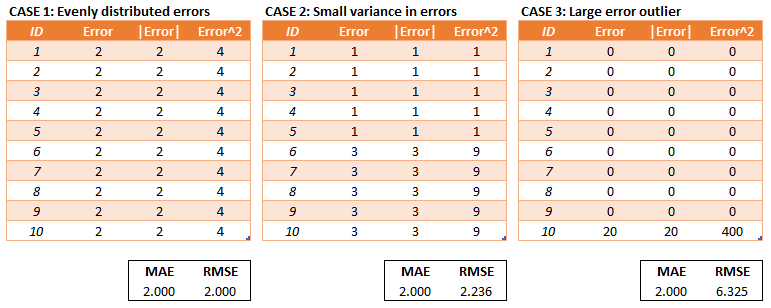

In [11]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_objetivo, y_pred))

4.679191295697281

## Coeficiente de determincación
El coeficiente de determinación (R2 o R-squared) mide la porción de la varianza de la variable objetivo que se puede explicar por el modelo.

$$r = r_{xy} = \dfrac{n\sum x_iy_i - \sum x_i \sum y_i}{\sqrt{n\sum x_i^2 - \left(\sum x_i \right)^2} \sqrt{n \sum y_i^2 - \left(\sum y_i \right)^2}}$$

El coeficiente de correlación no tiene en cuenta la complejidad del modelo, por tanto es mejor utilizar el coeficiente de determinación ajustado (Adjusted R-squared): 

$$1-\dfrac{(1-R^2)(n-1)}{(n-k-1)}$$

donde *n* es el número de observaciones y *k* es el número de coeficientes del modelo (sin contar el termino dependiente)

In [12]:
modelo_r2 = metrics.r2_score(y_objetivo, y_pred)
modelo_r2

0.7406426641094095

In [13]:
import numpy
np.corrcoef(y_objetivo, y_pred)**2

array([[1.        , 0.74064266],
       [0.74064266, 1.        ]])

In [14]:
len(modelo.coef_)

13

In [15]:
modelo_r2_ajustado = 1 - ((1-modelo_r2)*(len(boston["target"])-1))/(len(boston["target"]) - len(modelo.coef_) - 1)
modelo_r2_ajustado

0.733789726372463